<a href="https://colab.research.google.com/github/adeakinwe/computer_vision/blob/main/neural_network_relu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3

CLASS_NAMES = ["daisy", "dandelion", "roses", "sunflowers", "tulips"]

In [2]:
def read_and_decode(filename, resize_dims):
    # 1. Read the raw file
    img_bytes = tf.io.read_file(filename)
    # 2. Decode image data
    img = tf.image.decode_jpeg(img_bytes, channels=IMG_CHANNELS)
    # 3. Convert pixel values to floats in [0, 1]
    img = tf.image.convert_image_dtype(img, tf.float32)
    # 4. Resize the image to match desired dimensions
    img = tf.image.resize(img, resize_dims)
    return img

In [3]:
def parse_csvline(csv_line):
    # record_defaults specify the data types for each column
    record_default = ["", ""]
    filename, label_string = tf.io.decode_csv(csv_line, record_default)

    # Load the image
    img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])

    # Convert label string to integer based on the CLASS_NAMES index
    label = tf.argmax(tf.math.equal(CLASS_NAMES, label_string))
    return img, label

In [4]:
# Define datasets
train_dataset = (
    tf.data.TextLineDataset("gs://cloud-ml-data/img/flower_photos/train_set.csv")
    .map(parse_csvline, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(16)
    .prefetch(tf.data.AUTOTUNE)
)

eval_dataset = (
    tf.data.TextLineDataset("gs://cloud-ml-data/img/flower_photos/eval_set.csv")
    .map(parse_csvline, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(16)
    .prefetch(tf.data.AUTOTUNE)
)

In [5]:
for image_batch, label_batch in train_dataset.take(1):
    print("Image batch shape:", image_batch.shape)
    print("Label batch shape:", label_batch.shape)
    print("Labels:", label_batch.numpy())

Image batch shape: (16, 224, 224, 3)
Label batch shape: (16,)
Labels: [0 1 1 1 0 2 1 0 4 3 0 3 1 4 4 1]


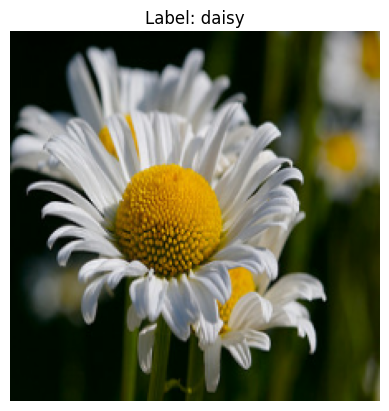

In [6]:
import matplotlib.pyplot as plt

for image_batch, label_batch in train_dataset.take(1):
    # Take the first image from the batch
    first_image = image_batch[0]
    first_label = label_batch[0]

    # Convert tensor to numpy array
    plt.imshow(first_image.numpy())
    plt.title(f"Label: {CLASS_NAMES[first_label]}")
    plt.axis('off')
    plt.show()

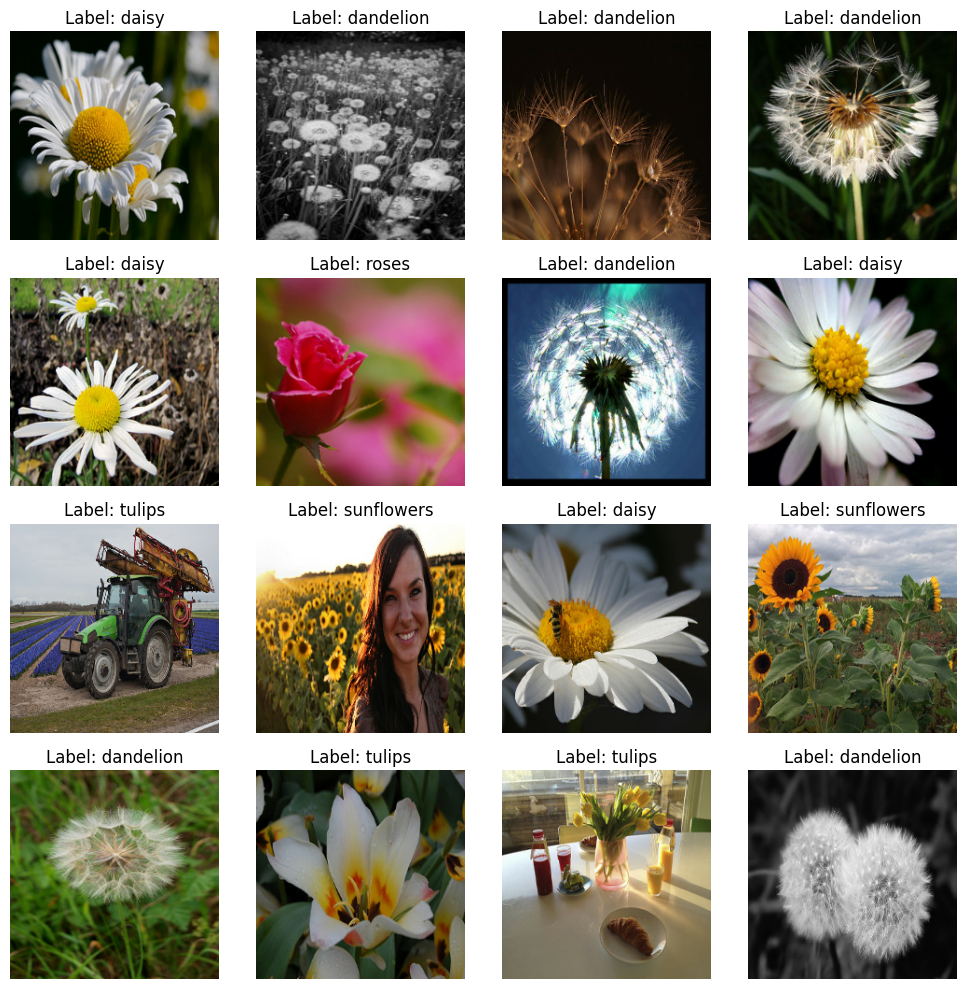

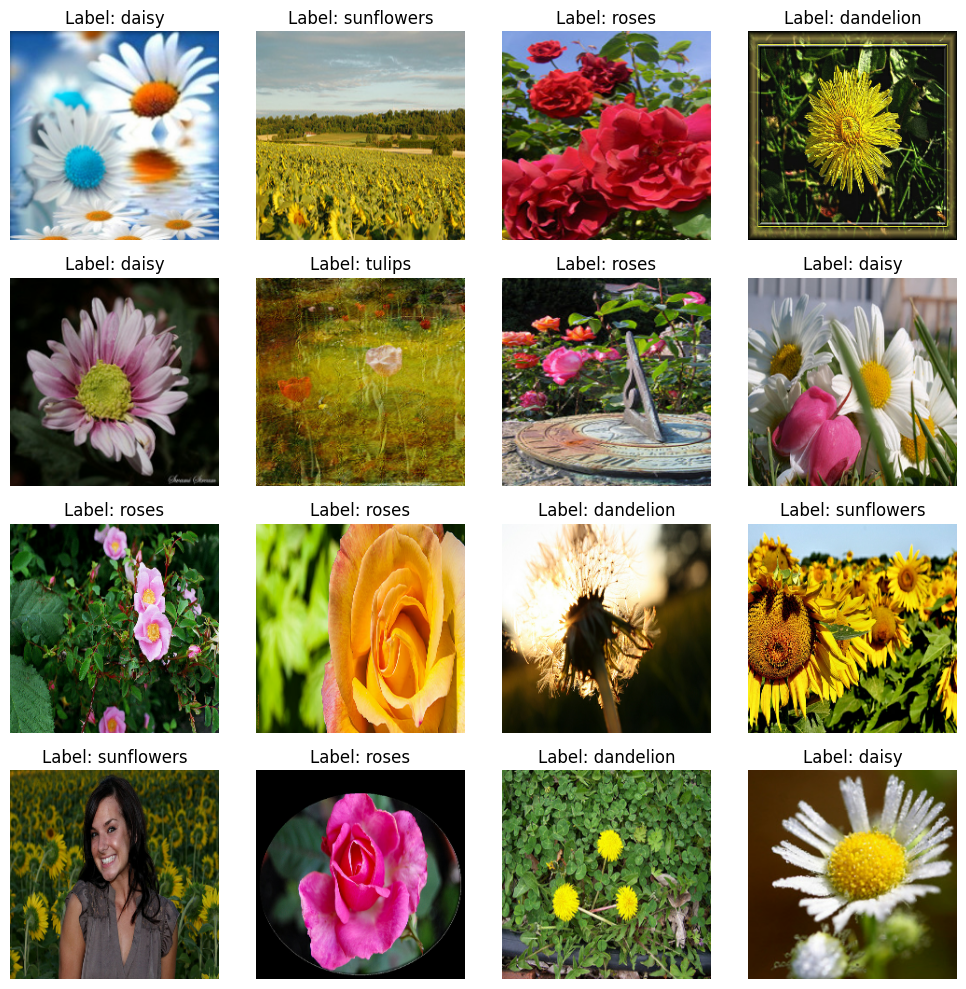

In [7]:
import matplotlib.pyplot as plt

# Take one batch from the dataset
for image_batch, label_batch in train_dataset.take(2):
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))  # Create a 4x4 grid

    for i in range(16):  # Loop over the first 16 images
        ax = axes[i // 4, i % 4]  # Determine grid position
        ax.imshow(image_batch[i].numpy())  # Convert tensor to numpy array
        ax.set_title(f"Label: {CLASS_NAMES[label_batch[i]]}")
        ax.axis("off")  # Hide axes

    plt.tight_layout()
    plt.show()

In [8]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(len(CLASS_NAMES), activation="softmax")
])

model.compile(
    optimizer="adam",
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
EPOCHS = 10

history = model.fit(
    train_dataset,
    validation_data=eval_dataset,
    epochs=EPOCHS
)

Epoch 1/10
    207/Unknown 208s 996ms/step - accuracy: 0.3050 - loss: 19.5744

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


207/207 ━━━━━━━━━━━━━━━━━━━━ 232s 1s/step - accuracy: 0.3052 - loss: 19.5245 - val_accuracy: 0.2811 - val_loss: 9.5462
Epoch 2/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.4020 - loss: 4.5386 - val_accuracy: 0.2919 - val_loss: 4.9740
Epoch 3/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 199s 779ms/step - accuracy: 0.3463 - loss: 2.8209 - val_accuracy: 0.2973 - val_loss: 1.5348
Epoch 4/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 200s 772ms/step - accuracy: 0.3414 - loss: 1.5403 - val_accuracy: 0.2730 - val_loss: 1.6039
Epoch 5/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 201s 767ms/step - accuracy: 0.3034 - loss: 1.5470 - val_accuracy: 0.2000 - val_loss: 1.5624
Epoch 6/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 201s 762ms/step - accuracy: 0.2864 - loss: 1.5342 - val_accuracy: 0.2459 - val_loss: 1.5901
Epoch 7/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 202s 762ms/step - accuracy: 0.2686 - loss: 1.5439 - val_accuracy: 0.2568 - val_loss: 1.5032
Epoch 8/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 142s 469ms/step - accuracy: 0.3134 - loss: 1.4609 - 

In [2]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

NameError: name 'history' is not defined